In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set_theme()

In [2]:
data = pd.read_csv(r'C:\Users\hp\Desktop\2BDA Notes\Practical\BD2P3(Machine Learning 1)\Assignment 02\boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [4]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
data_type = pd.DataFrame(data.dtypes).T.rename({0:'Column Data Type'})
null_value = pd.DataFrame(data.isnull().sum()).T.rename({0:'Null Values'})

data_info = data_type.append(null_value)
data_info

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
Column Data Type,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64
Null Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
null_percentage = pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.rename({0:'Percentage of Null Values'}).round(2)

data_info = data_info.append(null_percentage)
data_info

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
Column Data Type,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64
Null Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percentage of Null Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Univariate Linear Regression
Univariate Linear Regression means I will do Linear Regression but only use 1 attribute to predict the output.

From a mathematic point of view, univariate linear regression is a way to find parameters for the linear equation:

$Y = a*X + b$

Where,
- $Y$ = output
- $X$ = input
- $a$ = slope of the line (gradient) aka regression coefficient
- $b$ = intercept

We already have $X$ and $Y$ values, the linear regression algorithm will find the best $a$ and $b$ parameters for us.

## Feature Selection
Since `RM` has the highest correlation to `MEDV`, I will use this attribute to make univariate linear regression.

In [7]:
# I use [[]] to create a dataframe
# if you use [], it will create a series

X = data[['RM']]
X.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [8]:
Y = data[['MEDV']]
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Instantiating the Model
For this project, I will use the Scikit-learn library to make linear regression. But there are some notes when using this library:
- Every model inside scikit-learn is saved as a class, not an instance
- We need to create an instance using the class of the model we want to use
- We can say that an instance of a class is an object of a class

In [9]:
# import linear regression library
from sklearn.linear_model import LinearRegression

# instantiating the model
model = LinearRegression()

## Train - Test Split
We need to split our dataset into 2 datasets:
- Train dataset, used to train our model. The machine will try to capture the pattern of our dataset. And that's what we called a model.
- Test dataset, used to test our model

The rule of thumb for splitting datasets is 70% for train dataset and 30% for the test dataset.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=1)

In [11]:
# let's see the shape of each dataset

print(X.shape)
print(Y.shape)
print()
print(X_train.shape)
print(Y_train.shape)
print()
print(X_test.shape)
print(Y_test.shape)

(506, 1)
(506, 1)

(354, 1)
(354, 1)

(152, 1)
(152, 1)


## Fitting the Model
Fitting means we sent our dataset to the machine for learning the pattern.

In [12]:
model.fit(X_train, Y_train)

LinearRegression()

## Parameter Estimates
- After training the model, sklearn's parameters are saved inside the model's object
- The name of that parameter is always followed by underscore symbol (\_)

In [13]:
# first, let's see the coefficient value (a)
model_coef = model.coef_
model_coef.round(2)

array([[8.46]])

In [14]:
# model intercept (b)
model_intercept = model.intercept_
model_intercept.round(2)

array([-30.57])

## Prediction
From these parameters, we can form our equation:

$Y = a * X + b$

$Y = 8.46 * X + (-30.57)$

Hence,

$MEDV = 8.46 * RM - 30.57$

Let's try to predict `MEDV` with new `RM` data. Make sure our input is a 2D array. We can use `reshape(-1,1)` to transform our data into 2D.

In [15]:
# using built-in predict
new_RM = np.array([6.5]).reshape(-1,1)
model.predict(new_RM).round(2)

array([[24.43]])

In [16]:
# using equation
equation_predict = (model_coef * new_RM) + model_intercept
equation_predict.round(2)

array([[24.43]])

Using built-in `predict` or calculating it using an equation gives the same result. Then, how about predicting the test dataset?

In [17]:
# predict test dataset
y_test_pred = model.predict(X_test)

# let's check the prediction and the actual value
print(Y_test[:5].values)
print()
print(y_test_pred[:5].round(2))

[[28.2]
 [23.9]
 [16.6]
 [22. ]
 [20.8]]

[[27.38]
 [26.08]
 [20.45]
 [19.16]
 [14.8 ]]


## Model Evaluation
Used to evaluate the performance of our model

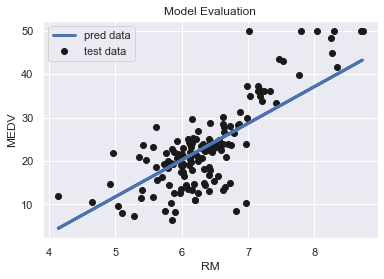

In [18]:
plt.scatter(X_test, Y_test, label='test data', color='k')
plt.plot(X_test, y_test_pred, label='pred data', color='b', linewidth=3)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Model Evaluation')
plt.legend(loc='upper left')

# plt.savefig('./output/linear-regression.png')
plt.show()

### Residual
- It is the difference between the prediction results and the test data
- So we can call it as a prediction error
- If residual is in random form, not patterned, it means the model 'works'
- If residual = patterned (linear/nonlinear), there is a possibility for improvement
- Ideal residual = symmetrical and random

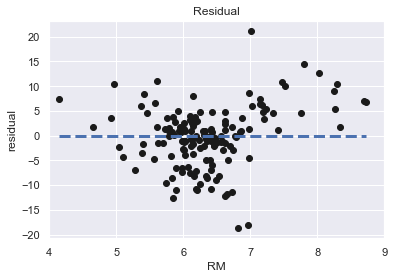

In [19]:
residual = Y_test - y_test_pred

plt.scatter(X_test, residual, color='k')
plt.hlines(y=0, xmin=X_test.min(), xmax=X_test.max(), linestyle='--', linewidth=3)
plt.xlim((4,9))
plt.xlabel('RM')
plt.ylabel('residual')
plt.title('Residual')
plt.show()

### Mean Squared Error
How to define our model performance? We can use the residual (error) value and calculate the average. So, we get the average of residuals.

In [20]:
residual.mean().round(2)

MEDV   -0.24
dtype: float64

- The average residual is -0.24, it's close to 0
- But there is a problem: residuals can be positive or negative
- Averaging 'canceled' the value, so it's not accurate
- Solution: make a square for each residual, then do the average (mean squared error)

We can calculate the MSE manually, or using a built-in function from Scikit-learn.

In [21]:
# manual calculation
(residual**2).mean().round(2)

MEDV    36.52
dtype: float64

In [22]:
# using function from scikit-learn
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, y_test_pred).round(2)

36.52

- In general, the smaller the MSE, the better, yet there is no absolute good or bad threshold.
- We can define it based on the dependent variable, i.e., MEDV in the test set.
- To make the scale of errors to be the same as the scale of targets, root mean squared error (RMSE) is often used. It is the square root of MSE.

In [23]:
np.sqrt(mean_squared_error(Y_test, y_test_pred)).round(2)

6.04

### R-Squared
It is the proportion of total variation explained by the model. We can use `score()` to obtain the R-squared value.

In [24]:
model.score(X_test, Y_test).round(3)

0.602

Here, around 60% of the variability in the testing data is explained by our model.

If you want to manually calculate R-squared, you need to calculate the variance of the test dataset and residual.

Step to calculate variance:
- Calculate the difference between each datapoint with the average
- Calculate the squared of difference
- Sum all of the squared roots, it's called variance

#### Total Variance of Test Set

In [25]:
# step 1, calculate the difference
diff = (Y_test - Y_test.mean())
diff.head()

,MEDV
307,5.217763
343,0.917763
47,-6.382237
67,-0.982237
362,-2.182237


In [26]:
# step 2, calculate the squared of difference
squared = diff**2
squared.head()

,MEDV
307,27.225052
343,0.842289
47,40.732947
67,0.964789
362,4.762158


In [27]:
# step 3, sum all the squared root
variance_test = squared.sum()
variance_test.round(2)

MEDV    13931.48
dtype: float64

#### Total Variance of Residual
- Since residual = Y_test - y_test_pred, we can say residual = diff
- I will calculate the variance in 1 line of code to make it simple

In [28]:
variance_residual = (residual**2).sum()
variance_residual.round(2)

MEDV    5550.62
dtype: float64

#### Proportion of Total Variation
It's R-squared.

In [29]:
R_sqr = 1 - (variance_residual)/(variance_test)
R_sqr.round(3)

MEDV    0.602
dtype: float64

It has the same value as `score()`, right?
- A perfect model explains all the variations in the data
- Note R-squared is between 0% and 100%
    - 0% indicates that the model explains none of the variability of the response data around its mean.
    - 100% indicates that the model explains all of it.

# Multivariate Linear Regression
Multivariate Linear Regression means I will do Linear Regression with more than 1 attribute to predict the output.

From a mathematic point of view, multivariate linear regression is similar to univariate linear regression, it's a way to find parameters for the linear equation:

$Y = a_1*X_1 + a_2*X_2 + ... + a_n * X_n + b$

Where,
- $Y$ = output
- $X$ = input
- $a$ = slope of the line (gradient) aka regression coefficient
- $b$ = intercept

We already have $X$ and $Y$ values, the linear regression algorithm will find the best $a$ and $b$ parameters for us. But, this time we need to find more than 1 coefficient. For multivariate linear regression, I will use `RM` and `LSTAT` to predict `MEDV` those have the highest correlation to `MEDV`.

The steps are the same as univariate regression, so I'll straight to coding without many explanations.

## Building the Model

In [30]:
# feature selection
X2 = data[['RM','LSTAT']]
Y = data[['MEDV']]

# train - test split
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=1)

# instantiating the model
model_2 = LinearRegression()

# fitting the model
model_2.fit(X2_train, Y_train)

LinearRegression()

In [31]:
model_2_coef = model_2.coef_.round(2)
model_2_coef

array([[ 4.13, -0.68]])

In [32]:
model_2_intercept = model_2.intercept_.round(2)
model_2_intercept

array([5.32])

From the above values, we can rewrite our equation:

$Y = a_1*X_1 + a_2*X_2 + b$

$Y = 4.13*X_1 + (-0.68)*X_2 + 5.32$

Hence,

$MEDV = 4.13*RM - 0.68*LSTAT + 5.32$

In [33]:
# predict
y_test_pred_2 = model_2.predict(X2_test)

## Visualizing the Data

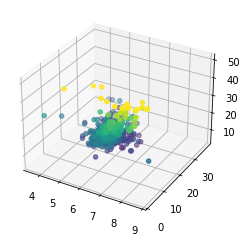

In [34]:
# I'm resetting the seaborn theme
# because the surface can't be transparent
sns.reset_orig()

# visualize the data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# X_viz = X2.values.reshape(-1,2)
# x1 = X_viz[:,0]
# x2 = X_viz[:,1]
x1 = X2['RM']
x2 = X2['LSTAT']
x3 = Y['MEDV']

ax.scatter3D(x1, x2, x3, c=x3, cmap='viridis');

plt.show()

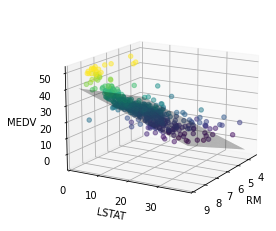

In [35]:
# adding a meshgrid
x_surf, y_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 100), np.linspace(x2.min(), x2.max(), 100))
onlyX = pd.DataFrame({
        'RM':x_surf.ravel(),
        'LSTAT':y_surf.ravel()})
fittedY = model_2.predict(onlyX)
fittedY = np.array(fittedY)

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=x3, cmap='viridis', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fittedY.reshape(x_surf.shape), color='None', alpha=0.3)
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
ax.view_init(elev=15, azim=30)
plt.show()

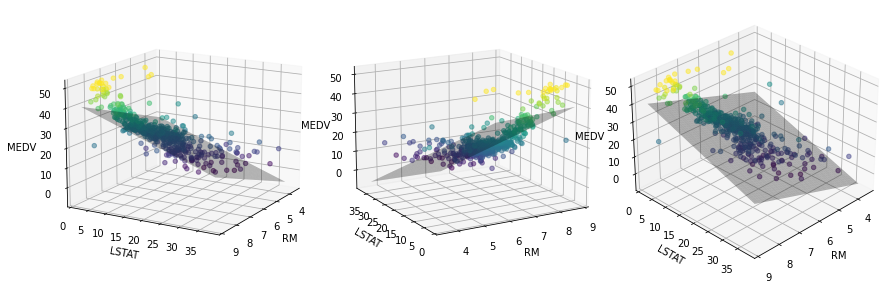

In [36]:
# plot with different point of view
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
axes = [ax1, ax2, ax3]

for ax in axes:
    ax.scatter(x1, x2, x3, c=x3, cmap='viridis', marker='o', alpha=0.5)
    ax.plot_surface(x_surf, y_surf, fittedY.reshape(x_surf.shape), color='None', alpha=0.3)
    ax.set_xlabel('RM')
    ax.set_ylabel('LSTAT')
    ax.set_zlabel('MEDV')

ax1.view_init(elev=15, azim=30)
ax2.view_init(elev=15, azim=-120)
ax3.view_init(elev=30, azim=45)
fig.tight_layout()
plt.show()

# Comparing Model

## Mean Squared Error
- An easy metric for linear regression is the mean squared error (MSE) on the testing data
- Better models have lower MSE

In [37]:
mse_1 = mean_squared_error(Y_test, y_test_pred)
mse_2 = mean_squared_error(Y_test, y_test_pred_2)

print('Univariate Linear Regression MSE:', mse_1.round(2))
print('Multivariate Linear Regression MSE:', mse_2.round(2))

Univariate Linear Regression MSE: 36.52
Multivariate Linear Regression MSE: 28.93


In [38]:
# calculate improvement of MSE
mse_percentage = (mse_1-mse_2)/mse_1 * 100

print(f'Improvement: {mse_percentage.round(2)}% reduction')

Improvement: 20.76% reduction


## R-Squared
- Another scoring method, we can use R-squared
- The score is represented in percentage value, ranging from 0% to 100%
- Better models have higher R-squared

In [39]:
R_sqr_1 = model.score(X_test, Y_test)
R_sqr_2 = model_2.score(X2_test, Y_test)

print('Univariate Linear Regression R-Squared:', R_sqr_1.round(3))
print('Multivariate Linear Regression R-Squared:', R_sqr_2.round(3))

Univariate Linear Regression R-Squared: 0.602
Multivariate Linear Regression R-Squared: 0.684


In [40]:
# calculate improvement of MSE
R_sqr_percentage = (R_sqr_2-R_sqr_1)/R_sqr_1 * 100

print(f'Improvement: {R_sqr_percentage.round(2)}% adjustment')

Improvement: 13.75% adjustment


# Conclusion
Using multivariate linear regression, we can see some improvement. But, the R-square score is still under 70%. So, this project has a possibility for improvement. Such as handling the imbalance (skewed) data, feature selection, etc.